In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Sheart\Sheart_AN_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,4,130.0,322.0,0,2,109.0,NaN,NaN,NaN,3.0,3.0
1,0.0,67.0,3,115.0,564.0,0,2,160.0,0.0,1.6,2.0,0.0,7.0
2,1.0,57.0,2,124.0,261.0,0,0,141.0,0.0,0.3,1.0,0.0,7.0
3,1.0,64.0,4,128.0,263.0,0,0,105.0,1.0,0.2,2.0,1.0,7.0
4,0.0,74.0,2,120.0,269.0,0,2,121.0,1.0,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,3,172.0,199.0,1,0,162.0,0.0,0.5,1.0,0.0,7.0
266,1.0,44.0,2,120.0,263.0,0,0,173.0,0.0,0.0,1.0,0.0,7.0
267,0.0,56.0,2,140.0,294.0,0,2,153.0,0.0,1.3,2.0,0.0,3.0
268,1.0,57.0,4,140.0,192.0,0,0,148.0,0.0,0.4,2.0,0.0,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	7
float64		column 2	8
int64		column 3	0
float64		column 4	7
float64		column 5	7
int64		column 6	0
int64		column 7	0
float64		column 8	21
float64		column 9	21
float64		column 10	22
float64		column 11	50
float64		column 12	7
float64		column 13	21


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,263.000000,262.000000,270.000000,263.000000,263.000000,270.000000,270.000000,249.000000,249.000000,248.000000,220.000000,263.000000,249.000000
mean,0.680608,54.301527,3.174074,131.395437,250.307985,0.148148,1.022222,149.465863,0.345382,1.056048,1.581818,0.665399,4.742972
std,0.467130,9.173337,0.950090,17.999881,51.660964,0.355906,0.997891,23.218454,0.476450,1.157323,0.602610,0.938073,1.944336
min,0.000000,29.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,0.000000,47.000000,3.000000,120.000000,213.500000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,1.000000,55.000000,3.000000,130.000000,246.000000,0.000000,2.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,1.000000,61.000000,4.000000,140.000000,281.500000,0.000000,2.000000,165.000000,1.000000,1.650000,2.000000,1.000000,7.000000
max,1.000000,77.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


<AxesSubplot:>

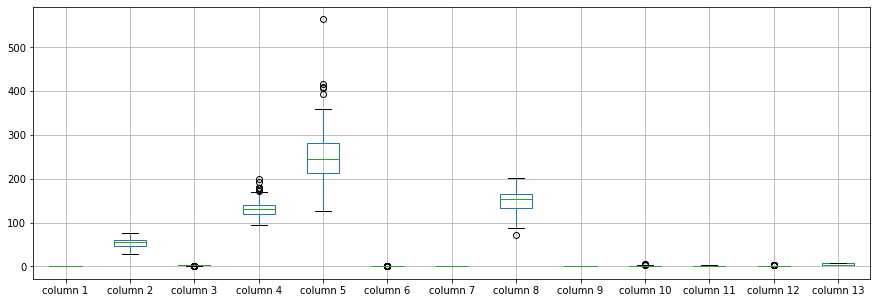

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.680608
column 2      54.301527
column 3       3.174074
column 4     131.395437
column 5     250.307985
column 6       0.148148
column 7       1.022222
column 8     149.465863
column 9       0.345382
column 10      1.056048
column 11      1.581818
column 12      0.665399
column 13      4.742972
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,-0.068561,0.045967,-0.065352,-0.193983,0.033418,0.067445,-0.107263,0.186650,0.085380,0.070517,0.072302,0.393295
column 2,-0.068561,1.000000,0.121603,0.256117,0.194072,0.119741,0.126429,-0.414058,0.110881,0.194073,0.132334,0.382758,0.109643
column 3,0.045967,0.121603,1.000000,-0.055788,0.086143,-0.098537,0.074325,-0.298950,0.373262,0.174906,0.167062,0.219588,0.244546
column 4,-0.065352,0.256117,-0.055788,1.000000,0.160669,0.158302,0.114460,-0.043783,0.067562,0.202241,0.064563,0.063381,0.109760
column 5,-0.193983,0.194072,0.086143,0.160669,1.000000,0.003940,0.155270,-0.036064,0.084459,0.018889,0.032474,0.088275,0.034576
column 6,0.033418,0.119741,-0.098537,0.158302,0.003940,1.000000,0.053499,0.044226,0.005245,-0.030120,0.051075,0.114835,0.060341
column 7,0.067445,0.126429,0.074325,0.114460,0.155270,0.053499,1.000000,-0.090251,0.112056,0.127456,0.186638,0.099268,-0.044041
column 8,-0.107263,-0.414058,-0.298950,-0.043783,-0.036064,0.044226,-0.090251,1.000000,-0.404285,-0.304648,-0.416949,-0.246713,-0.243768
column 9,0.186650,0.110881,0.373262,0.067562,0.084459,0.005245,0.112056,-0.404285,1.000000,0.249874,0.245038,0.156968,0.300779
column 10,0.085380,0.194073,0.174906,0.202241,0.018889,-0.030120,0.127456,-0.304648,0.249874,1.000000,0.589855,0.267405,0.347320


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+77,13+77+77,13+77+77+77,13+77+77+77+77,13+77+77+77+77+77,13+77+77+77+77,13+77+77+77,13+77+77,13+77,13], vae_layer = False, seed = 77)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 584.9659957885742
Epoch: 1 , loss: 586.0566024780273
Epoch: 2 , loss: 585.0670700073242
Epoch: 3 , loss: 584.5537948608398
Epoch: 4 , loss: 584.3855361938477
Epoch: 5 , loss: 584.5102767944336
Epoch: 6 , loss: 584.6363220214844
Epoch: 7 , loss: 584.4046783447266
Epoch: 8 , loss: 583.3518753051758
Epoch: 9 , loss: 583.9316787719727
Epoch: 10 , loss: 586.4027557373047
Epoch: 11 , loss: 585.0342903137207
Epoch: 12 , loss: 584.9231185913086
Epoch: 13 , loss: 584.0360641479492
Epoch: 14 , loss: 584.1101570129395
Epoch: 15 , loss: 577.348388671875
Epoch: 16 , loss: 572.0972061157227
Epoch: 17 , loss: 568.2003650665283
Epoch: 18 , loss: 563.9694137573242
Epoch: 19 , loss: 559.895881652832
Epoch: 20 , loss: 543.460205078125
Epoch: 21 , loss: 528.068639755249
Epoch: 22 , loss: 510.89745903015137
Epoch: 23 , loss: 495.23055839538574
Epoch: 24 , loss: 472.15793800354004
Epoch: 25 , loss: 454.0775260925293
Epoch: 

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(270, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       1.0
column 2      48.0
column 3       2.0
column 4     130.0
column 5     245.0
column 6       0.0
column 7       2.0
column 8     180.0
column 9       0.0
column 10      0.2
column 11      2.0
column 12      0.0
column 13      3.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Sheart.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.0,0.0,0,0.0,0.0,0,0,0.0,0.262727,-1.409814,-0.708743,0.0,0.0
1,0.0,0.0,0,0.0,0.0,0,0,0.0,0.000000,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0,0.0,0.0,0,0,0.0,0.000000,0.000000,0.000000,0.0,0.0
3,0.0,0.0,0,0.0,0.0,0,0,0.0,0.000000,0.000000,0.000000,0.0,0.0
4,0.0,0.0,0,0.0,0.0,0,0,0.0,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.0,0.0,0,0.0,0.0,0,0,0.0,0.000000,0.000000,0.000000,0.0,0.0
266,0.0,0.0,0,0.0,0.0,0,0,0.0,0.000000,0.000000,0.000000,0.0,0.0
267,0.0,0.0,0,0.0,0.0,0,0,0.0,0.000000,0.000000,0.000000,0.0,0.0
268,0.0,0.0,0,0.0,0.0,0,0,0.0,0.000000,0.000000,0.000000,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(555.152075337847, 5414.752392307519)

In [17]:
NRMS=numerator/denominator
NRMS


0.10252584700392306

In [18]:
new_df.iloc[66,:]

column 1       1.0
column 2      51.0
column 3       4.0
column 4     140.0
column 5     261.0
column 6       0.0
column 7       2.0
column 8     186.0
column 9       1.0
column 10      0.0
column 11      1.0
column 12      0.0
column 13      3.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,1.0,70.0,4,130.0,322.0,0,2,109.0,0.262727,0.990186,1.291257,3.0,3.0
1,0.0,67.0,3,115.0,564.0,0,2,160.0,0.000000,1.600000,2.000000,0.0,7.0
2,1.0,57.0,2,124.0,261.0,0,0,141.0,0.000000,0.300000,1.000000,0.0,7.0
3,1.0,64.0,4,128.0,263.0,0,0,105.0,1.000000,0.200000,2.000000,1.0,7.0
4,0.0,74.0,2,120.0,269.0,0,2,121.0,1.000000,0.200000,1.000000,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,3,172.0,199.0,1,0,162.0,0.000000,0.500000,1.000000,0.0,7.0
266,1.0,44.0,2,120.0,263.0,0,0,173.0,0.000000,0.000000,1.000000,0.0,7.0
267,0.0,56.0,2,140.0,294.0,0,2,153.0,0.000000,1.300000,2.000000,0.0,3.0
268,1.0,57.0,4,140.0,192.0,0,0,148.0,0.000000,0.400000,2.000000,0.0,6.0


In [20]:
imputations[-1].to_excel("Sheart_AN_5(imp).xlsx", index=False, header=False)